# Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm
import pickle
import csv

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

# Data Exploration

In [ ]:
filenames = []
for file in os.listdir('E:/CSE499 Machine Learning/all data file/odis_male/data'):
    filenames.append(os.path.join('E:/CSE499 Machine Learning/all data file/odis_male/data', file))

In [ ]:
filenames[0:5]

['E:/CSE499 Machine Learning/all data file/odis_male/data\\1000887.yaml',
 'E:/CSE499 Machine Learning/all data file/odis_male/data\\1000889.yaml',
 'E:/CSE499 Machine Learning/all data file/odis_male/data\\1000891.yaml',
 'E:/CSE499 Machine Learning/all data file/odis_male/data\\1000893.yaml',
 'E:/CSE499 Machine Learning/all data file/odis_male/data\\1000895.yaml']

In [ ]:
final_df = pd.DataFrame()
counter = 1
for file in tqdm(filenames):
    with open(file, 'r') as f:
        df = pd.json_normalize(safe_load(f))
        df['match_id'] = counter
        final_df = final_df.append(df)
        counter+=1

final_df

100%|██████████| 2391/2391 [59:07<00:00,  1.48s/it]  


,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.dates,info.gender,info.match_type,info.outcome.by.runs,...,info.registry.people.Umair Ali,info.registry.people.Y Punja,info.registry.people.Zaheer Maqsood,info.registry.people.KMC Bandara,info.registry.people.SP Terry,info.registry.people.DJ Worrall,info.registry.people.CP Tremain,info.registry.people.JM Mennie,info.registry.people.DS Weerakkody,info.registry.people.Rokhan Barakzai
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.91,2017-01-14,2,6,Brisbane,[2017-01-13],male,ODI,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.91,2017-01-18,1,6,NaN,[2017-01-15],male,ODI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",0.91,2017-01-21,1,6,Perth,[2017-01-19],male,ODI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.91,2017-01-22,1,6,NaN,[2017-01-22],male,ODI,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.91,2017-01-28,1,6,NaN,[2017-01-26],male,ODI,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[{'1st innings': {'team': 'Afghanistan', 'deli...",0.91,2016-07-13,1,6,Belfast,[2016-07-12],male,ODI,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Afghanistan', 'deli...",0.91,2016-07-20,1,6,Belfast,[2016-07-17],male,ODI,79.0,...,NaN,NaN,NaN,NaN,7f87204d,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Ireland', 'deliveri...",0.91,2016-07-20,1,6,Belfast,[2016-07-19],male,ODI,12.0,...,NaN,NaN,NaN,NaN,7f87204d,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Scotland', 'deliver...",0.91,2016-08-20,1,6,Edinburgh,[2016-08-14],male,ODI,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# data store

In [ ]:
#data store as pickle file
pickle.dump(final_df, open('cse499_odi_international_male.pkl','wb'))

NameError: ignored

# data load

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
final_df = pickle.load(open('/content/drive/MyDrive/odi men/cse499_odi_international_male.pkl','rb'))
final_df.head()

,innings,meta.data_version,meta.created,meta.revision,info.balls_per_over,info.city,info.dates,info.gender,info.match_type,info.outcome.by.runs,...,info.registry.people.Umair Ali,info.registry.people.Y Punja,info.registry.people.Zaheer Maqsood,info.registry.people.KMC Bandara,info.registry.people.SP Terry,info.registry.people.DJ Worrall,info.registry.people.CP Tremain,info.registry.people.JM Mennie,info.registry.people.DS Weerakkody,info.registry.people.Rokhan Barakzai
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.91,2017-01-14,2,6,Brisbane,[2017-01-13],male,ODI,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.91,2017-01-18,1,6,NaN,[2017-01-15],male,ODI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Pakistan', 'deliver...",0.91,2017-01-21,1,6,Perth,[2017-01-19],male,ODI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.91,2017-01-22,1,6,NaN,[2017-01-22],male,ODI,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.91,2017-01-28,1,6,NaN,[2017-01-26],male,ODI,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Pre-Processing and Analysis

In [6]:
final_df = final_df[[
    'match_id',
    'innings',
    'info.dates',
    'info.gender',
    'info.match_type',
    'info.teams',
    'info.toss.winner',
    'info.toss.decision',
    'info.outcome.winner',
    'info.outcome.by.runs',
    'info.outcome.by.wickets',
    'info.overs',
    'info.player_of_match',
    'info.umpires',
    'info.venue',
    'info.city'
]]

final_df.head()

,match_id,innings,info.dates,info.gender,info.match_type,info.teams,info.toss.winner,info.toss.decision,info.outcome.winner,info.outcome.by.runs,info.outcome.by.wickets,info.overs,info.player_of_match,info.umpires,info.venue,info.city
0,1,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-01-13],male,ODI,"[Australia, Pakistan]",Australia,bat,Australia,92.0,NaN,50,[MS Wade],"[MD Martell, C Shamshuddin]","Brisbane Cricket Ground, Woolloongabba",Brisbane
0,2,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-01-15],male,ODI,"[Australia, Pakistan]",Australia,bat,Pakistan,NaN,6.0,50,[Mohammad Hafeez],"[CB Gaffaney, P Wilson]",Melbourne Cricket Ground,NaN
0,3,"[{'1st innings': {'team': 'Pakistan', 'deliver...",[2017-01-19],male,ODI,"[Australia, Pakistan]",Australia,field,Australia,NaN,7.0,50,[SPD Smith],"[SD Fry, C Shamshuddin]",Western Australia Cricket Association Ground,Perth
0,4,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-01-22],male,ODI,"[Australia, Pakistan]",Australia,bat,Australia,86.0,NaN,50,[DA Warner],"[CB Gaffaney, MD Martell]",Sydney Cricket Ground,NaN
0,5,"[{'1st innings': {'team': 'Australia', 'delive...",[2017-01-26],male,ODI,"[Australia, Pakistan]",Australia,bat,Australia,57.0,NaN,50,[DA Warner],"[SD Fry, C Shamshuddin]",Adelaide Oval,NaN


In [7]:
final_df['info.gender'].value_counts()

male    2391
Name: info.gender, dtype: int64

In [8]:
final_df['info.match_type'].value_counts()

ODI    2391
Name: info.match_type, dtype: int64

In [9]:
final_df['info.overs'].value_counts()

50    2391
Name: info.overs, dtype: int64

In [10]:
# 50 over match data
final_df = final_df[final_df['info.overs'] == 50]
final_df.drop(columns=['info.overs','info.match_type'],inplace=True)
final_df.shape

(2391, 14)

# extract first & second innings data

In [11]:
# No Result Matches
final_df[final_df['info.outcome.winner'].isnull()]

,match_id,innings,info.dates,info.gender,info.teams,info.toss.winner,info.toss.decision,info.outcome.winner,info.outcome.by.runs,info.outcome.by.wickets,info.player_of_match,info.umpires,info.venue,info.city
0,9,"[{'1st innings': {'team': 'Afghanistan', 'deli...",[2016-07-04],male,"[Scotland, Afghanistan]",Scotland,field,NaN,NaN,NaN,NaN,"[M Hawthorne, IN Ramage]","Grange Cricket Club Ground, Raeburn Place",Edinburgh
0,11,"[{'1st innings': {'team': 'Scotland', 'deliver...",[2016-09-08],male,"[Scotland, Hong Kong]",Hong Kong,field,NaN,NaN,NaN,NaN,"[GO Brathwaite, IN Ramage]","Grange Cricket Club Ground, Raeburn Place",Edinburgh
0,27,"[{'1st innings': {'team': 'New Zealand', 'deli...",[2017-06-02],male,"[Australia, New Zealand]",New Zealand,bat,NaN,NaN,NaN,NaN,"[RK Illingworth, RA Kettleborough]",Edgbaston,Birmingham
0,30,"[{'1st innings': {'team': 'Bangladesh', 'deliv...",[2017-06-05],male,"[Australia, Bangladesh]",Bangladesh,bat,NaN,NaN,NaN,NaN,"[CB Gaffaney, NJ Llong]",Kennington Oval,London
0,61,"[{'1st innings': {'team': 'England', 'deliveri...",[2017-09-21],male,"[England, West Indies]",West Indies,field,NaN,NaN,NaN,NaN,"[RJ Tucker, RJ Bailey]",Trent Bridge,Nottingham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2293,"[{'1st innings': {'team': 'Pakistan', 'deliver...",[2015-05-31],male,"[Pakistan, Zimbabwe]",Pakistan,bat,NaN,NaN,NaN,NaN,"[Ahsan Raza, RB Tiffin]",Gaddafi Stadium,Lahore
0,2319,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",[2016-06-21],male,"[England, Sri Lanka]",England,field,NaN,NaN,NaN,[CR Woakes],"[RJ Bailey, PR Reiffel]",Trent Bridge,Nottingham
0,2321,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",[2016-06-26],male,"[England, Sri Lanka]",England,field,NaN,NaN,NaN,NaN,"[PR Reiffel, RT Robinson]",County Ground,Bristol
0,2333,"[{'1st innings': {'team': 'New Zealand', 'deli...",[2016-01-02],male,"[New Zealand, Sri Lanka]",Sri Lanka,field,NaN,NaN,NaN,NaN,"[BF Bowden, RK Illingworth]",Saxton Oval,Nelson


# remove no result matches

In [12]:
final_df = final_df.dropna(subset=['info.outcome.winner'])
final_df.shape

(2270, 14)

In [13]:
final_df.iloc[0]['innings'][0]['1st innings']['deliveries']

[{0.1: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.2: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.3: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.4: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.5: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'extras': {'wides': 1},
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 1, 'total': 1}}},
 {0.6: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {'batsman': 0, 'extras': 0, 'total': 0}}},
 {0.7: {'batsman': 'DA Warner',
   'bowler': 'Mohammad Amir',
   'non_striker': 'TM Head',
   'runs': {

In [14]:
count = 0
delivery_df_1st_innings = pd.DataFrame()
for index, row in final_df.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    winner = []
    win_by_runs = []
    win_by_wickets = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][0]['1st innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            winner.append(row['info.outcome.winner'])
            win_by_runs.append(row['info.outcome.by.runs'])
            win_by_wickets.append(row['info.outcome.by.wickets'])
            ball_of_match.append(key)
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'winner':winner,
            'win_by_runs':win_by_runs,
            'win_by_wickets':win_by_wickets,
            'ball':ball_of_match,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df_1st_innings = delivery_df_1st_innings.append(loop_df)

In [15]:
delivery_df_1st_innings.head()

,match_id,teams,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,venue
0,1,"[Australia, Pakistan]",Australia,Australia,92.0,NaN,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,"[Australia, Pakistan]",Australia,Australia,92.0,NaN,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,"[Australia, Pakistan]",Australia,Australia,92.0,NaN,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,"[Australia, Pakistan]",Australia,Australia,92.0,NaN,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,"[Australia, Pakistan]",Australia,Australia,92.0,NaN,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"


In [16]:
count = 0
delivery_df_2nd_innings = pd.DataFrame()
for index, row in final_df.iterrows():
    if count in [75,108,150,180,268,360,443,458,584,748,982,1052,1111,1226,1345]:
        count+=1
        continue
    count+=1
    ball_of_match = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    winner = []
    win_by_runs = []
    win_by_wickets = []
    match_id = []
    city = []
    venue = []
    for ball in row['innings'][1]['2nd innings']['deliveries']:
        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][1]['2nd innings']['team'])
            teams.append(row['info.teams'])
            winner.append(row['info.outcome.winner'])
            win_by_runs.append(row['info.outcome.by.runs'])
            win_by_wickets.append(row['info.outcome.by.wickets'])
            ball_of_match.append(key)
            runs.append(ball[key]['runs']['total'])
            city.append(row['info.city'])
            venue.append(row['info.venue'])
            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append('0')
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'winner':winner,
            'win_by_runs':win_by_runs,
            'win_by_wickets':win_by_wickets,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'city':city,
            'venue':venue
        })
    delivery_df_2nd_innings = delivery_df_2nd_innings.append(loop_df)

In [17]:
delivery_df_2nd_innings.head()

,match_id,teams,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,venue
0,1,"[Australia, Pakistan]",Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,1,"[Australia, Pakistan]",Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,1,"[Australia, Pakistan]",Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
3,1,"[Australia, Pakistan]",Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
4,1,"[Australia, Pakistan]",Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"


In [18]:
run_data = delivery_df_1st_innings.groupby(['match_id', 'runs'])['runs'].count().reset_index(name="count")

In [19]:
run_data.head()

,match_id,runs,count
0,1,0,148
1,1,1,117
2,1,2,18
3,1,3,1
4,1,4,22


# batting and bowling team separation

In [20]:
def bowl(row):
    for team in row['teams']:
        if team != row['batting_team']:
            return team

In [21]:
# First Innings
delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings.apply(bowl,axis=1)

delivery_df_1st_innings.head()

,match_id,teams,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,venue,bowling_team
0,1,"[Australia, Pakistan]",Australia,Australia,92.0,NaN,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
1,1,"[Australia, Pakistan]",Australia,Australia,92.0,NaN,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
2,1,"[Australia, Pakistan]",Australia,Australia,92.0,NaN,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
3,1,"[Australia, Pakistan]",Australia,Australia,92.0,NaN,0.4,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan
4,1,"[Australia, Pakistan]",Australia,Australia,92.0,NaN,0.5,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan


In [22]:
# Second Innings
delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings.apply(bowl,axis=1)

delivery_df_2nd_innings.head()

,match_id,teams,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,venue,bowling_team
0,1,"[Australia, Pakistan]",Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
1,1,"[Australia, Pakistan]",Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
2,1,"[Australia, Pakistan]",Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
3,1,"[Australia, Pakistan]",Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
4,1,"[Australia, Pakistan]",Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia


In [23]:
# Drop columns
delivery_df_1st_innings.drop(columns=['teams'],inplace=True)
delivery_df_2nd_innings.drop(columns=['teams'],inplace=True)

In [24]:
delivery_df_1st_innings['batting_team'].unique()

array(['Australia', 'Pakistan', 'Afghanistan', 'Scotland', 'Zimbabwe',
       'New Zealand', 'Bangladesh', 'South Africa', 'India', 'England',
       'Sri Lanka', 'Hong Kong', 'Papua New Guinea', 'West Indies',
       'Ireland', 'United Arab Emirates', 'Nepal',
       'United States of America', 'Namibia', 'Oman', 'Netherlands',
       'Canada', 'Jersey', 'Africa XI', 'Kenya', 'Bermuda', 'Asia XI'],
      dtype=object)

In [25]:
# First Innings
# delivery_df_1st_innings['batting_team'] = delivery_df_1st_innings['batting_team'].str.replace('Saudi Arabia','United Arab Emirates')
# delivery_df_1st_innings['bowling_team'] = delivery_df_1st_innings['bowling_team'].str.replace('Saudi Arabia','United Arab Emirates')

# Second Innings
# delivery_df_2nd_innings['batting_team'] = delivery_df_2nd_innings['batting_team'].str.replace('Saudi Arabia','United Arab Emirates')
# delivery_df_2nd_innings['bowling_team'] = delivery_df_2nd_innings['bowling_team'].str.replace('Saudi Arabia','United Arab Emirates')

In [26]:
teams = [
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka',
    'Zimbabwe',
    'Ireland',
    'Netherlands'
]

In [27]:
# First Innings
delivery_df_1st_innings = delivery_df_1st_innings[delivery_df_1st_innings['batting_team'].isin(teams)]
delivery_df_1st_innings = delivery_df_1st_innings[delivery_df_1st_innings['bowling_team'].isin(teams)]

# Second Innings
delivery_df_2nd_innings = delivery_df_2nd_innings[delivery_df_2nd_innings['batting_team'].isin(teams)]
delivery_df_2nd_innings = delivery_df_2nd_innings[delivery_df_2nd_innings['bowling_team'].isin(teams)]

In [28]:
delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,venue,bowling_team
0,1,Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
1,1,Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
2,1,Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
3,1,Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia
4,1,Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Australia


# venue and city

In [29]:
delivery_df_2nd_innings.isnull().sum()

match_id                 0
winner                   0
win_by_runs         236848
win_by_wickets      246431
batting_team             0
ball                     0
runs                     0
player_dismissed         0
city                 70315
venue                    0
bowling_team             0
dtype: int64

In [30]:
delivery_df_2nd_innings[delivery_df_2nd_innings['city'].isnull()]['venue'].value_counts()

Harare Sports Club                         16479
Sydney Cricket Ground                       8096
Rangiri Dambulla International Stadium      7752
Melbourne Cricket Ground                    7604
Adelaide Oval                               7022
Sharjah Cricket Stadium                     7010
Pallekele International Cricket Stadium     5546
Dubai International Cricket Stadium         5258
Multan Cricket Stadium                      1245
Rawalpindi Cricket Stadium                  1099
Chittagong Divisional Stadium                803
Dubai Sports City Cricket Stadium            546
Galle International Stadium                  484
Perth Stadium                                473
Queenstown Events Centre                     433
Sharjah Cricket Association Stadium          274
Sheikhupura Stadium                          191
Name: venue, dtype: int64

In [31]:
# First Innings
cities = np.where(delivery_df_1st_innings['city'].isnull(), delivery_df_1st_innings['venue'].str.split().apply(lambda x:x[0]), delivery_df_1st_innings['city'])
delivery_df_1st_innings['city'] = cities

# Second Innings
cities = np.where(delivery_df_2nd_innings['city'].isnull(), delivery_df_2nd_innings['venue'].str.split().apply(lambda x:x[0]), delivery_df_2nd_innings['city'])
delivery_df_2nd_innings['city'] = cities

In [32]:
# Drop Venue Column

# First Innings
delivery_df_1st_innings.drop(columns=['venue'],inplace=True)
# Second Innings
delivery_df_2nd_innings.drop(columns=['venue'],inplace=True)

In [33]:
# Keeping only those venues where played atleast 5 matches

# First Innings
eligible_cities = delivery_df_1st_innings['city'].value_counts()[delivery_df_1st_innings['city'].value_counts() > 1500].index.tolist()
delivery_df_1st_innings = delivery_df_1st_innings[delivery_df_1st_innings['city'].isin(eligible_cities)]

# Second Innings
eligible_cities = delivery_df_2nd_innings['city'].value_counts()[delivery_df_2nd_innings['city'].value_counts() > 1500].index.tolist()
delivery_df_2nd_innings = delivery_df_2nd_innings[delivery_df_2nd_innings['city'].isin(eligible_cities)]

# current score

In [34]:
# First Innings
delivery_df_1st_innings['current_score'] = delivery_df_1st_innings.groupby('match_id').cumsum()['runs']

# Second Innings
delivery_df_2nd_innings['current_score'] = delivery_df_2nd_innings.groupby('match_id').cumsum()['runs']

In [35]:
delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score
0,1,Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,Australia,0
1,1,Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,Australia,0
2,1,Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,Australia,0
3,1,Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,Australia,1
4,1,Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,Australia,1


# wicket left

In [36]:
# First Innings
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings['player_dismissed'].astype('int')
delivery_df_1st_innings['player_dismissed'] = delivery_df_1st_innings.groupby('match_id').cumsum()['player_dismissed']
delivery_df_1st_innings['wickets_left'] = 10 - delivery_df_1st_innings['player_dismissed']

delivery_df_1st_innings.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left
0,1,Australia,Australia,92.0,NaN,0.1,0,0,Brisbane,Pakistan,0,10
1,1,Australia,Australia,92.0,NaN,0.2,0,0,Brisbane,Pakistan,0,10
2,1,Australia,Australia,92.0,NaN,0.3,0,0,Brisbane,Pakistan,0,10
3,1,Australia,Australia,92.0,NaN,0.4,0,0,Brisbane,Pakistan,0,10
4,1,Australia,Australia,92.0,NaN,0.5,1,0,Brisbane,Pakistan,1,10


In [37]:
# Second Innings
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings['player_dismissed'].astype('int')
delivery_df_2nd_innings['player_dismissed'] = delivery_df_2nd_innings.groupby('match_id').cumsum()['player_dismissed']
delivery_df_2nd_innings['wickets_left'] = 10 - delivery_df_2nd_innings['player_dismissed']

delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left
0,1,Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,Australia,0,10
1,1,Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,Australia,0,10
2,1,Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,Australia,0,10
3,1,Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,Australia,1,10
4,1,Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,Australia,1,10


# bowl delivered & bowl left

In [38]:
# First Innings
delivery_df_1st_innings['over'] = delivery_df_1st_innings['ball'].apply(lambda x:str(x).split(".")[0])
delivery_df_1st_innings['ball_no'] = delivery_df_1st_innings['ball'].apply(lambda x:str(x).split(".")[1])
delivery_df_1st_innings['balls_bowled'] = (delivery_df_1st_innings['over'].astype('int')*6) + delivery_df_1st_innings['ball_no'].astype('int')
delivery_df_1st_innings['balls_left'] = 300 - delivery_df_1st_innings['balls_bowled']
delivery_df_1st_innings['balls_left'] = delivery_df_1st_innings['balls_left'].apply(lambda x:0 if x<0 else x)

delivery_df_1st_innings.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left
0,1,Australia,Australia,92.0,NaN,0.1,0,0,Brisbane,Pakistan,0,10,0,1,1,299
1,1,Australia,Australia,92.0,NaN,0.2,0,0,Brisbane,Pakistan,0,10,0,2,2,298
2,1,Australia,Australia,92.0,NaN,0.3,0,0,Brisbane,Pakistan,0,10,0,3,3,297
3,1,Australia,Australia,92.0,NaN,0.4,0,0,Brisbane,Pakistan,0,10,0,4,4,296
4,1,Australia,Australia,92.0,NaN,0.5,1,0,Brisbane,Pakistan,1,10,0,5,5,295


In [39]:
# Second Innings
delivery_df_2nd_innings['over'] = delivery_df_2nd_innings['ball'].apply(lambda x:str(x).split(".")[0])
delivery_df_2nd_innings['ball_no'] = delivery_df_2nd_innings['ball'].apply(lambda x:str(x).split(".")[1])
delivery_df_2nd_innings['balls_bowled'] = (delivery_df_2nd_innings['over'].astype('int')*6) + delivery_df_2nd_innings['ball_no'].astype('int')
delivery_df_2nd_innings['balls_left'] = 300 - delivery_df_2nd_innings['balls_bowled']
delivery_df_2nd_innings['balls_left'] = delivery_df_2nd_innings['balls_left'].apply(lambda x:0 if x<0 else x)

delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left
0,1,Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,Australia,0,10,0,1,1,299
1,1,Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,Australia,0,10,0,2,2,298
2,1,Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,Australia,0,10,0,3,3,297
3,1,Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,Australia,1,10,0,4,4,296
4,1,Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,Australia,1,10,0,5,5,295


# current run rate

In [40]:
# First Innings
delivery_df_1st_innings['crr'] = round((delivery_df_1st_innings['current_score']*6)/delivery_df_1st_innings['balls_bowled'], 2)

# Second Innings
delivery_df_2nd_innings['crr'] = round((delivery_df_2nd_innings['current_score']*6)/delivery_df_2nd_innings['balls_bowled'], 2)

In [41]:
delivery_df_2nd_innings.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr
0,1,Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,Australia,0,10,0,1,1,299,0.0
1,1,Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,Australia,0,10,0,2,2,298,0.0
2,1,Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,Australia,0,10,0,3,3,297,0.0
3,1,Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,Australia,1,10,0,4,4,296,1.5
4,1,Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,Australia,1,10,0,5,5,295,1.2


# Run In Every Last Five Over (Score Prediction)

In [148]:
groups = delivery_df_1st_innings.groupby('match_id')

match_ids = delivery_df_1st_innings['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

In [149]:
delivery_df_1st_innings['last_five'] = last_five

In [150]:
delivery_df_1st_innings.dropna(inplace=True)

In [151]:
delivery_df_1st_innings.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,last_five


# Score and Win Probabilty (before the start of the match and during the first innings)

# total score counting according to match

In [46]:
total_df = delivery_df_1st_innings.groupby('match_id').sum()['runs'].reset_index()
score_probability_output = delivery_df_1st_innings.merge(total_df,on='match_id')

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y
0,1,Australia,Australia,92.0,NaN,0.1,0,0,Brisbane,Pakistan,0,10,0,1,1,299,0.0,268
1,1,Australia,Australia,92.0,NaN,0.2,0,0,Brisbane,Pakistan,0,10,0,2,2,298,0.0,268
2,1,Australia,Australia,92.0,NaN,0.3,0,0,Brisbane,Pakistan,0,10,0,3,3,297,0.0,268
3,1,Australia,Australia,92.0,NaN,0.4,0,0,Brisbane,Pakistan,0,10,0,4,4,296,0.0,268
4,1,Australia,Australia,92.0,NaN,0.5,1,0,Brisbane,Pakistan,1,10,0,5,5,295,1.2,268


# counting runs in remaining balls

In [47]:
score_probability_output['runs_in_remaining_ball'] = score_probability_output['runs_y'] - score_probability_output['current_score']

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y,runs_in_remaining_ball
0,1,Australia,Australia,92.0,NaN,0.1,0,0,Brisbane,Pakistan,0,10,0,1,1,299,0.0,268,268
1,1,Australia,Australia,92.0,NaN,0.2,0,0,Brisbane,Pakistan,0,10,0,2,2,298,0.0,268,268
2,1,Australia,Australia,92.0,NaN,0.3,0,0,Brisbane,Pakistan,0,10,0,3,3,297,0.0,268,268
3,1,Australia,Australia,92.0,NaN,0.4,0,0,Brisbane,Pakistan,0,10,0,4,4,296,0.0,268,268
4,1,Australia,Australia,92.0,NaN,0.5,1,0,Brisbane,Pakistan,1,10,0,5,5,295,1.2,268,267


# consider batting team win

In [48]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

score_probability_output['result_first_innings'] = score_probability_output.apply(result, axis=1)

score_probability_output.head()

,match_id,batting_team,winner,win_by_runs,win_by_wickets,ball,runs_x,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,runs_y,runs_in_remaining_ball,result_first_innings
0,1,Australia,Australia,92.0,NaN,0.1,0,0,Brisbane,Pakistan,0,10,0,1,1,299,0.0,268,268,1
1,1,Australia,Australia,92.0,NaN,0.2,0,0,Brisbane,Pakistan,0,10,0,2,2,298,0.0,268,268,1
2,1,Australia,Australia,92.0,NaN,0.3,0,0,Brisbane,Pakistan,0,10,0,3,3,297,0.0,268,268,1
3,1,Australia,Australia,92.0,NaN,0.4,0,0,Brisbane,Pakistan,0,10,0,4,4,296,0.0,268,268,1
4,1,Australia,Australia,92.0,NaN,0.5,1,0,Brisbane,Pakistan,1,10,0,5,5,295,1.2,268,267,1


# final data for score probabilty

In [49]:
final_score_probability_df = score_probability_output[['batting_team','bowling_team','city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left','crr', 'runs_in_remaining_ball']]
final_score_probability_df.head()

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Australia,Pakistan,Brisbane,0,1,299,10,0.0,268
1,Australia,Pakistan,Brisbane,0,2,298,10,0.0,268
2,Australia,Pakistan,Brisbane,0,3,297,10,0.0,268
3,Australia,Pakistan,Brisbane,0,4,296,10,0.0,268
4,Australia,Pakistan,Brisbane,1,5,295,10,1.2,267


In [50]:
final_score_probability_df = final_score_probability_df[final_score_probability_df['balls_left'] != 0]
final_score_probability_df

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Australia,Pakistan,Brisbane,0,1,299,10,0.00,268
1,Australia,Pakistan,Brisbane,0,2,298,10,0.00,268
2,Australia,Pakistan,Brisbane,0,3,297,10,0.00,268
3,Australia,Pakistan,Brisbane,0,4,296,10,0.00,268
4,Australia,Pakistan,Brisbane,1,5,295,10,1.20,267
...,...,...,...,...,...,...,...,...,...
520628,Ireland,Afghanistan,Belfast,255,295,5,5,5.19,10
520629,Ireland,Afghanistan,Belfast,259,296,4,5,5.25,6
520630,Ireland,Afghanistan,Belfast,263,297,3,5,5.31,2
520631,Ireland,Afghanistan,Belfast,264,298,2,5,5.32,1


# final innings score probability data extraction

In [52]:
pickle.dump(final_score_probability_df, open('/content/drive/MyDrive/odi men/odi_international_mens_first_innings_score.pkl','wb'))

# win probabilty

In [53]:
final_win_probability_df = score_probability_output[[
    'batting_team',
    'bowling_team',
    'city',
    'runs_y',
    'result_first_innings'
]]

final_win_probability_df.head()

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Australia,Pakistan,Brisbane,268,1
1,Australia,Pakistan,Brisbane,268,1
2,Australia,Pakistan,Brisbane,268,1
3,Australia,Pakistan,Brisbane,268,1
4,Australia,Pakistan,Brisbane,268,1


# final first innings win data extraction

In [54]:
pickle.dump(final_win_probability_df, open('/content/drive/MyDrive/odi men/odi_international_mens_first_innings_win.pkl','wb'))

# Win Probabilty (during the second innings)

# target runs from first innings

In [55]:
total_score_df = delivery_df_1st_innings.groupby([
    'match_id',
]).sum()['runs'].reset_index()

total_score_df.head()

,match_id,runs
0,1,268
1,2,220
2,3,263
3,4,353
4,5,369


In [56]:
total_score_df['target_runs'] = total_score_df['runs'] + 1
total_score_df.drop(columns=['runs'], inplace=True)

total_score_df.head()

,match_id,target_runs
0,1,269
1,2,221
2,3,264
3,4,354
4,5,370


# merge with second innings data

In [57]:
final_2nd_innings_win_df = delivery_df_2nd_innings.merge(total_score_df, on='match_id')
final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs
0,1,Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,Australia,0,10,0,1,1,299,0.0,269
1,1,Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,Australia,0,10,0,2,2,298,0.0,269
2,1,Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,Australia,0,10,0,3,3,297,0.0,269
3,1,Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,Australia,1,10,0,4,4,296,1.5,269
4,1,Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,Australia,1,10,0,5,5,295,1.2,269


# runs left

In [58]:
final_2nd_innings_win_df['runs_left'] = final_2nd_innings_win_df['target_runs'] - final_2nd_innings_win_df['current_score']
final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left
0,1,Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,Australia,0,10,0,1,1,299,0.0,269,269
1,1,Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,Australia,0,10,0,2,2,298,0.0,269,269
2,1,Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,Australia,0,10,0,3,3,297,0.0,269,269
3,1,Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,Australia,1,10,0,4,4,296,1.5,269,268
4,1,Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,Australia,1,10,0,5,5,295,1.2,269,268


# required run rate

In [59]:
final_2nd_innings_win_df['rrr'] = round((final_2nd_innings_win_df['runs_left']*6)/final_2nd_innings_win_df['balls_left'], 2)

final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,current_score,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left,rrr
0,1,Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,Australia,0,10,0,1,1,299,0.0,269,269,5.40
1,1,Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,Australia,0,10,0,2,2,298,0.0,269,269,5.42
2,1,Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,Australia,0,10,0,3,3,297,0.0,269,269,5.43
3,1,Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,Australia,1,10,0,4,4,296,1.5,269,268,5.43
4,1,Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,Australia,1,10,0,5,5,295,1.2,269,268,5.45


In [60]:
final_2nd_innings_win_df.isnull().sum()

match_id                 0
winner                   0
win_by_runs         213054
win_by_wickets      228397
batting_team             0
ball                     0
runs                     0
player_dismissed         0
city                     0
bowling_team             0
current_score            0
wickets_left             0
over                     0
ball_no                  0
balls_bowled             0
balls_left               0
crr                      0
target_runs              0
runs_left                0
rrr                      8
dtype: int64

In [61]:
final_2nd_innings_win_df = final_2nd_innings_win_df[final_2nd_innings_win_df['balls_left'] != 0]

In [62]:
final_2nd_innings_win_df.isnull().sum()

match_id                 0
winner                   0
win_by_runs         213045
win_by_wickets      228229
batting_team             0
ball                     0
runs                     0
player_dismissed         0
city                     0
bowling_team             0
current_score            0
wickets_left             0
over                     0
ball_no                  0
balls_bowled             0
balls_left               0
crr                      0
target_runs              0
runs_left                0
rrr                      0
dtype: int64

# consider batting team win

In [63]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

final_2nd_innings_win_df['result'] = final_2nd_innings_win_df.apply(result, axis=1)

final_2nd_innings_win_df.head()

,match_id,winner,win_by_runs,win_by_wickets,batting_team,ball,runs,player_dismissed,city,bowling_team,...,wickets_left,over,ball_no,balls_bowled,balls_left,crr,target_runs,runs_left,rrr,result
0,1,Australia,92.0,NaN,Pakistan,0.1,0,0,Brisbane,Australia,...,10,0,1,1,299,0.0,269,269,5.40,0
1,1,Australia,92.0,NaN,Pakistan,0.2,0,0,Brisbane,Australia,...,10,0,2,2,298,0.0,269,269,5.42,0
2,1,Australia,92.0,NaN,Pakistan,0.3,0,0,Brisbane,Australia,...,10,0,3,3,297,0.0,269,269,5.43,0
3,1,Australia,92.0,NaN,Pakistan,0.4,1,0,Brisbane,Australia,...,10,0,4,4,296,1.5,269,268,5.43,0
4,1,Australia,92.0,NaN,Pakistan,0.5,0,0,Brisbane,Australia,...,10,0,5,5,295,1.2,269,268,5.45,0


# final data for second innings win

In [64]:
final_2nd_innings_win_df = final_2nd_innings_win_df[[
    'batting_team',
    'bowling_team',
    'city',
    'current_score',
    'target_runs',
    'runs_left',
    'balls_left',
    'wickets_left',
    'crr',
    'rrr',
    'result'
]]

final_2nd_innings_win_df.head()

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Pakistan,Australia,Brisbane,0,269,269,299,10,0.0,5.40,0
1,Pakistan,Australia,Brisbane,0,269,269,298,10,0.0,5.42,0
2,Pakistan,Australia,Brisbane,0,269,269,297,10,0.0,5.43,0
3,Pakistan,Australia,Brisbane,1,269,268,296,10,1.5,5.43,0
4,Pakistan,Australia,Brisbane,1,269,268,295,10,1.2,5.45,0


# final second innings win data extraction

In [65]:
pickle.dump(final_2nd_innings_win_df, open('/content/drive/MyDrive/odi men/odi_international_mens_second_innings_win.pkl','wb'))

# Machine Learning Model

In [86]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

# score probability

In [67]:
#load data
score_portability_df = pickle.load(open('/content/drive/MyDrive/odi men/odi_international_mens_first_innings_score.pkl','rb'))
score_portability_df.shape

(519187, 9)

In [68]:
score_portability_df.to_csv(r'/content/drive/MyDrive/odi men/odi_international_mens_first_innings_score.csv', index=False, header=True)
score_portability_df = pd.read_csv(r'/content/drive/MyDrive/odi men/odi_international_mens_first_innings_score.csv')

score_portability_df

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr,runs_in_remaining_ball
0,Australia,Pakistan,Brisbane,0,1,299,10,0.00,268
1,Australia,Pakistan,Brisbane,0,2,298,10,0.00,268
2,Australia,Pakistan,Brisbane,0,3,297,10,0.00,268
3,Australia,Pakistan,Brisbane,0,4,296,10,0.00,268
4,Australia,Pakistan,Brisbane,1,5,295,10,1.20,267
...,...,...,...,...,...,...,...,...,...
519182,Ireland,Afghanistan,Belfast,255,295,5,5,5.19,10
519183,Ireland,Afghanistan,Belfast,259,296,4,5,5.25,6
519184,Ireland,Afghanistan,Belfast,263,297,3,5,5.31,2
519185,Ireland,Afghanistan,Belfast,264,298,2,5,5.32,1


In [69]:
score_portability_df.isnull().sum()

batting_team              0
bowling_team              0
city                      0
current_score             0
balls_bowled              0
balls_left                0
wickets_left              0
crr                       0
runs_in_remaining_ball    0
dtype: int64

In [70]:
X = score_portability_df.drop(columns=['runs_in_remaining_ball'])
y = score_portability_df['runs_in_remaining_ball'].values

In [71]:
X

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr
0,Australia,Pakistan,Brisbane,0,1,299,10,0.00
1,Australia,Pakistan,Brisbane,0,2,298,10,0.00
2,Australia,Pakistan,Brisbane,0,3,297,10,0.00
3,Australia,Pakistan,Brisbane,0,4,296,10,0.00
4,Australia,Pakistan,Brisbane,1,5,295,10,1.20
...,...,...,...,...,...,...,...,...
519182,Ireland,Afghanistan,Belfast,255,295,5,5,5.19
519183,Ireland,Afghanistan,Belfast,259,296,4,5,5.25
519184,Ireland,Afghanistan,Belfast,263,297,3,5,5.31
519185,Ireland,Afghanistan,Belfast,264,298,2,5,5.32


In [72]:
pickle.dump(X, open('/content/drive/MyDrive/odi men/X_input_odi_mens_first_innings_score.pkl','wb'))
X = pickle.load(open('/content/drive/MyDrive/odi men/X_input_odi_mens_first_innings_score.pkl','rb'))
X

,batting_team,bowling_team,city,current_score,balls_bowled,balls_left,wickets_left,crr
0,Australia,Pakistan,Brisbane,0,1,299,10,0.00
1,Australia,Pakistan,Brisbane,0,2,298,10,0.00
2,Australia,Pakistan,Brisbane,0,3,297,10,0.00
3,Australia,Pakistan,Brisbane,0,4,296,10,0.00
4,Australia,Pakistan,Brisbane,1,5,295,10,1.20
...,...,...,...,...,...,...,...,...
519182,Ireland,Afghanistan,Belfast,255,295,5,5,5.19
519183,Ireland,Afghanistan,Belfast,259,296,4,5,5.25
519184,Ireland,Afghanistan,Belfast,263,297,3,5,5.31
519185,Ireland,Afghanistan,Belfast,264,298,2,5,5.32


In [73]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [
      'batting_team','bowling_team','city'
    ]),
    (StandardScaler(), [
      'current_score', 'balls_bowled', 'balls_left', 'wickets_left', 'crr'
    ])
)

In [88]:
transformer.fit(X)

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city']),
                                ('standardscaler', StandardScaler(),
                                 ['current_score', 'balls_bowled', 'balls_left',
                                  'wickets_left', 'crr'])])

In [89]:
X_train,X_test,y_train,y_test = train_test_split(transformer.transform(X), y, test_size=0.05, random_state=1)
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.44547652,
         0.41749305, -0.58474771],
       [ 0.        ,  0.        ,  1.        , ..., -0.96677471,
        -0.45234613,  0.57073407],
       [ 0.        ,  0.        ,  0.        , ..., -0.6137119 ,
        -0.01742654, -1.08805573],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.74316826,
        -0.45234613,  0.16666989],
       [ 0.        ,  0.        ,  0.        , ...,  0.78677057,
         1.28733223,  1.32924052],
       [ 0.        ,  0.        ,  0.        , ..., -0.95500595,
        -2.19202448, -0.12397277]])

In [90]:
y_train

array([209, 126,  93, ..., 116, 284,  23])

# XgBoosting

In [91]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=20, random_state=1)

xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [92]:
y_pred = xgb.predict(X_test)
print('R-Square Score: '+str(r2_score(y_test, y_pred)))
print('Mean Absolute Error: '+str(mean_absolute_error(y_test, y_pred)))

R-Square Score: 0.9830882400915515
Mean Absolute Error: 3.2987851085186146


In [93]:
predictions_xgb = xgb.predict(X_test)
sample_xgb = pd.DataFrame(predictions_xgb, columns=['Predict'])
sample_xgb['Actual']=y_test
sample_xgb.head(20)

,Predict,Actual
0,159.786911,158
1,90.587334,91
2,97.941170,98
3,43.087925,43
4,222.979294,222
5,78.370659,79
6,24.499657,24
7,175.677582,175
8,233.019379,246
9,223.663986,221


In [94]:
score_portability_df['city'].unique()

array(['Brisbane', 'Melbourne', 'Perth', 'Sydney', 'Adelaide', 'Canberra',
       'Harare', 'Christchurch', 'Nelson', 'Auckland', 'Hamilton',
       'Wellington', 'London', 'Birmingham', 'Cardiff', 'Antigua',
       'Barbados', 'Bristol', 'Mirpur', 'Chittagong', 'Delhi',
       'Chandigarh', 'Visakhapatnam', 'Leeds', 'Southampton',
       'Manchester', 'Dublin', 'Pune', 'Cuttack', 'Kolkata',
       'Greater Noida', 'Sharjah', 'Abu Dhabi', 'Bulawayo', 'Kimberley',
       'Paarl', 'East London', 'Guyana', 'Rangiri', 'Colombo', 'St Lucia',
       'Trinidad', 'Jamaica', 'Hambantota', 'Pallekele',
       'Mount Maunganui', 'Dunedin', 'Chennai', 'Indore', 'Nagpur',
       'Nottingham', 'Chester-le-Street', 'Mumbai', 'Kanpur', 'Dubai',
       'Durban', 'Centurion', 'Cape Town', 'Johannesburg',
       'Port Elizabeth', 'Dhaka', 'Bloemfontein', 'Hobart', 'St Kitts',
       'Belfast', 'Sylhet', 'Chattogram', 'Napier', 'Guwahati',
       'Bridgetown', 'Hyderabad', 'Potchefstroom', 'Rajkot', 'Kara

In [95]:
score_portability_df['batting_team'].unique()

array(['Australia', 'Pakistan', 'Zimbabwe', 'New Zealand', 'Bangladesh',
       'South Africa', 'India', 'England', 'Sri Lanka', 'West Indies',
       'Ireland', 'Afghanistan', 'Netherlands'], dtype=object)

# result count first way

In [96]:
input_df = pd.DataFrame({'batting_team': ['India'], 'bowling_team': ['Sri Lanka'], 'city': ['St Vincent'], 'current_score': [170], 'balls_bowled': [180], 'balls_left': [120], 'wickets_left': [5], 'crr': [5.67]})
result = xgb.predict(transformer.transform(input_df))[0]

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 170)-8)+ ' to '+str(math.floor(result + 170)+4))

Probable Score: 202 to 214


# Random Forest

In [98]:
rf = RandomForestRegressor()

rf.fit(X_train,y_train)

RandomForestRegressor()

In [99]:
y_pred_rf = rf.predict(X_test)
print('R-Square Score: '+str(r2_score(y_test, y_pred_rf)))
print('Mean Absolute Error: '+str(mean_absolute_error(y_test, y_pred_rf)))

R-Square Score: 0.984697271865046
Mean Absolute Error: 3.346448145965702


In [100]:
predictions_rf = rf.predict(X_test)
sample_rf = pd.DataFrame(predictions_rf, columns=['Predict'])
sample_rf['Actual']=y_test
sample_rf.head(20)

,Predict,Actual
0,158.730000,158
1,90.340000,91
2,98.470000,98
3,43.390000,43
4,223.480000,222
5,78.850000,79
6,26.860000,24
7,171.380000,175
8,230.925833,246
9,221.250000,221


In [101]:
result = rf.predict(transformer.transform(pd.DataFrame([['Australia', 'Sri Lanka', 'Melbourne', 60, 60, 240, 1, 6.0]], columns=['batting_team', 'bowling_team', 'city', 'current_score', 'balls_bowled', 'balls_left', 'wickets_left', 'crr'])))

#math.floor(result)
print('Probable Score: '+str(math.floor(result + 60)-8)+ ' to '+str(math.floor(result + 60)+2))

Probable Score: 75 to 85


# Comparison Tables "Predict and Actual"

In [102]:
def display_dfs(dfs, gap=50, justify='center'):
    html = ""
    for title, df in dfs.items():
        df_html = df._repr_html_()
        cur_html = f'<div> <h4>{title}</h4> {df_html}</div>'
        html +=  cur_html
    html= f"""
    <div style="display:flex; gap:{gap}px; justify-content:{justify};">
        {html}
    </div>
    """
    display_html(html, raw=True)


dfs = {'XGBoost Regressor': sample_xgb.head(20),
       'Random Forest Regressor': sample_rf.head(20)}
# dfs = {'Model-1': sample3.head(20),
#        'Model-2': sample4.head(20),
#        'Model-3': sample5.head(20),
#        'Model-4': sample6.head(20)}
display_dfs(dfs, justify='flex-start')

,Predict,Actual
0,159.786911,158
1,90.587334,91
2,97.941170,98
3,43.087925,43
4,222.979294,222
5,78.370659,79
6,24.499657,24
7,175.677582,175
8,233.019379,246
9,223.663986,221


# Comparison Graph

# For  Xgboost

[Text(0.5, 1.0, 'XGBoost Regressor')]

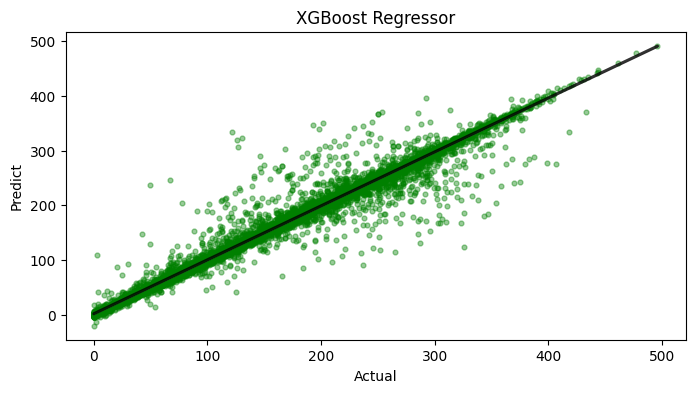

In [103]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.set(font_scale=1)

sns.regplot(data=sample_xgb, x='Actual', y='Predict',
            scatter_kws=dict(color='green', s=12, alpha=0.4),
            line_kws=dict(color='black', alpha=0.8), ).set(title='XGBoost Regressor')

# For Random Forest

[Text(0.5, 1.0, 'Random Forest Regressor')]

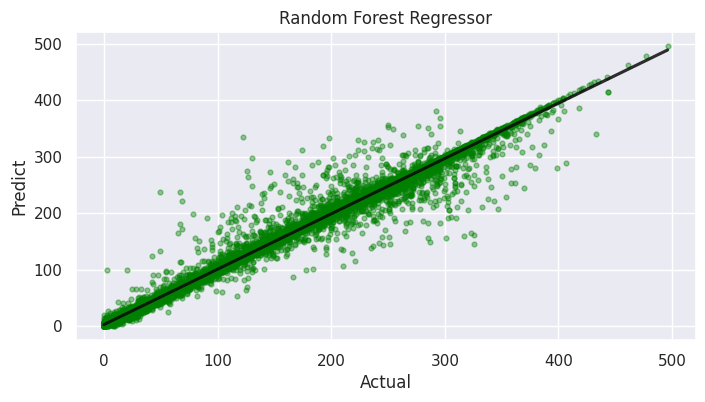

In [104]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.set(font_scale=1)

sns.regplot(data=sample_rf, x='Actual', y='Predict',
            scatter_kws=dict(color='green', s=12, alpha=0.4),
            line_kws=dict(color='black', alpha=0.8), ).set(title='Random Forest Regressor')

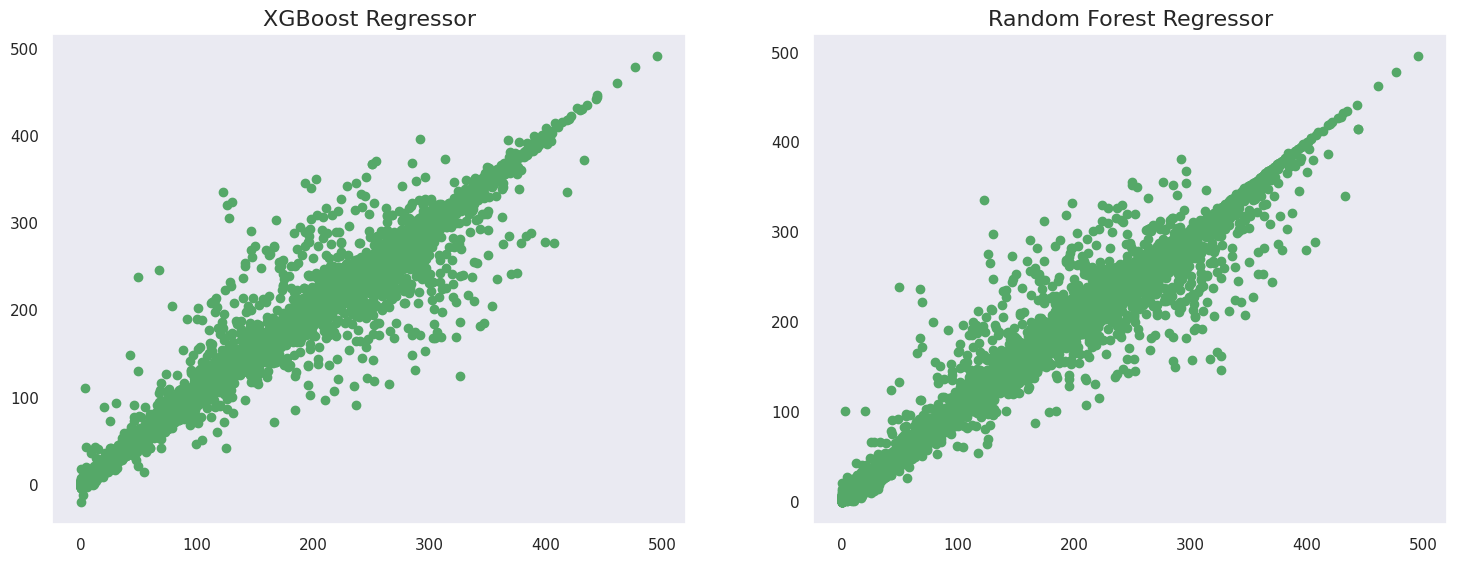

In [106]:
plt.rcParams["figure.figsize"] = (18, 14)

plt.subplot(2,2,1)
plt.title("XGBoost Regressor", fontsize=16)
plt.scatter(sample_xgb['Actual'], sample_xgb['Predict'], c='g')
plt.grid()

plt.subplot(2,2,2)
plt.title("Random Forest Regressor", fontsize=16)
plt.scatter(sample_rf['Actual'], sample_rf['Predict'], c='g')
plt.grid()

# model extraction

In [107]:
#Model Extraction
pickle.dump(xgb, open('/content/drive/MyDrive/odi men/odi_mens_score_prediction_final_model.pkl','wb'))

# win probability (first innings)

In [109]:
#load data
first_innings_win_portability_df = pickle.load(open('/content/drive/MyDrive/odi men/odi_international_mens_first_innings_win.pkl','rb'))
first_innings_win_portability_df

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Australia,Pakistan,Brisbane,268,1
1,Australia,Pakistan,Brisbane,268,1
2,Australia,Pakistan,Brisbane,268,1
3,Australia,Pakistan,Brisbane,268,1
4,Australia,Pakistan,Brisbane,268,1
...,...,...,...,...,...
520629,Ireland,Afghanistan,Belfast,265,1
520630,Ireland,Afghanistan,Belfast,265,1
520631,Ireland,Afghanistan,Belfast,265,1
520632,Ireland,Afghanistan,Belfast,265,1


In [111]:
first_innings_win_portability_df.to_csv(r'/content/drive/MyDrive/odi men/odi_international_mens_first_innings_win.csv', index=False, header=True)
first_innings_win_portability_df = pd.read_csv(r'/content/drive/MyDrive/odi men/odi_international_mens_first_innings_win.csv')
first_innings_win_portability_df

,batting_team,bowling_team,city,runs_y,result_first_innings
0,Australia,Pakistan,Brisbane,268,1
1,Australia,Pakistan,Brisbane,268,1
2,Australia,Pakistan,Brisbane,268,1
3,Australia,Pakistan,Brisbane,268,1
4,Australia,Pakistan,Brisbane,268,1
...,...,...,...,...,...
520629,Ireland,Afghanistan,Belfast,265,1
520630,Ireland,Afghanistan,Belfast,265,1
520631,Ireland,Afghanistan,Belfast,265,1
520632,Ireland,Afghanistan,Belfast,265,1


In [112]:
X1 = first_innings_win_portability_df.drop(columns=['result_first_innings'])
y1 = first_innings_win_portability_df['result_first_innings'].values

In [113]:
X1

,batting_team,bowling_team,city,runs_y
0,Australia,Pakistan,Brisbane,268
1,Australia,Pakistan,Brisbane,268
2,Australia,Pakistan,Brisbane,268
3,Australia,Pakistan,Brisbane,268
4,Australia,Pakistan,Brisbane,268
...,...,...,...,...
520629,Ireland,Afghanistan,Belfast,265
520630,Ireland,Afghanistan,Belfast,265
520631,Ireland,Afghanistan,Belfast,265
520632,Ireland,Afghanistan,Belfast,265


In [114]:
pickle.dump(X1, open('/content/drive/MyDrive/odi men/X_input_odi_mens_first_innings_win.pkl','wb'))
X1 = pickle.load(open('/content/drive/MyDrive/odi men/X_input_odi_mens_first_innings_win.pkl','rb'))
X1

,batting_team,bowling_team,city,runs_y
0,Australia,Pakistan,Brisbane,268
1,Australia,Pakistan,Brisbane,268
2,Australia,Pakistan,Brisbane,268
3,Australia,Pakistan,Brisbane,268
4,Australia,Pakistan,Brisbane,268
...,...,...,...,...
520629,Ireland,Afghanistan,Belfast,265
520630,Ireland,Afghanistan,Belfast,265
520631,Ireland,Afghanistan,Belfast,265
520632,Ireland,Afghanistan,Belfast,265


In [115]:
transformer1 = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [
      'batting_team', 'bowling_team', 'city'
    ]),
    (StandardScaler(), [
      'runs_y'
    ])
)

In [116]:
transformer1.fit(X1)

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city']),
                                ('standardscaler', StandardScaler(),
                                 ['runs_y'])])

In [117]:
X1_train,X1_test,y1_train,y1_test = train_test_split(transformer1.transform(X1), y1, test_size=0.1, random_state=1)

# LogisticRegression

In [118]:
lr1 = LogisticRegression()

lr1.fit(X1_train, y1_train)

LogisticRegression()

In [119]:
y1_pred = lr1.predict(X1_test)

print('Accuracy Score: '+str(accuracy_score(y1_test,y1_pred)*100))

Accuracy Score: 77.74277811923787


In [120]:
confusion_matrix_lr = confusion_matrix(y1_test, y1_pred)
confusion_matrix_lr

array([[20010,  5634],
       [ 5954, 20466]])

In [121]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78     25644
           1       0.78      0.77      0.78     26420

    accuracy                           0.78     52064
   macro avg       0.78      0.78      0.78     52064
weighted avg       0.78      0.78      0.78     52064



In [122]:
lr1.predict_proba(X1_test)[4]

array([0.07377611, 0.92622389])

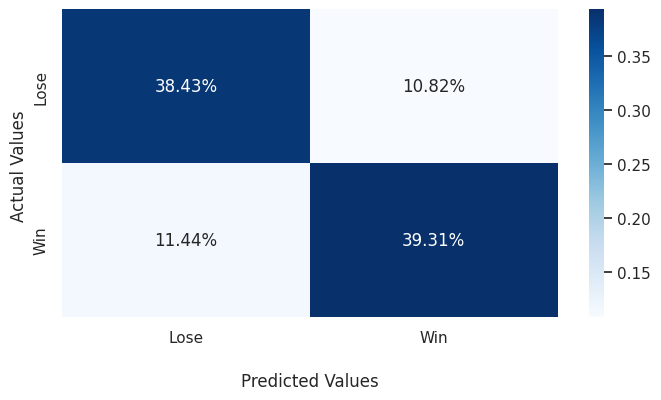

In [123]:
plt.rcParams["figure.figsize"] = (8, 4)

ax = sns.heatmap(confusion_matrix_lr/np.sum(confusion_matrix_lr), annot=True, fmt='.2%', cmap='Blues')
# ax.set_title('Logistic Regression\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Lose','Win'])
ax.yaxis.set_ticklabels(['Lose','Win'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [124]:
input_df = pd.DataFrame({'batting_team': ['India'], 'bowling_team': ['Sri Lanka'], 'city': ['Dubai'], 'runs_y': [250]})
result = lr1.predict_proba(transformer1.transform(input_df))

loss = result[0][1]
win = result[0][0]

print('win: '+str(round(win*100))+'%')
print('loss: '+str(round(loss*100))+'%')

win: 45%
loss: 55%


# Model Extraction

In [125]:
#Model Extraction
pickle.dump(lr1, open('/content/drive/MyDrive/odi men/odi_mens_1st_innings_win_prediction_final_model.pkl','wb'))

# win probability (second innings)

In [126]:
#load data
second_innings_win_portability_df = pickle.load(open('/content/drive/MyDrive/odi men/odi_international_mens_second_innings_win.pkl','rb'))
second_innings_win_portability_df

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Pakistan,Australia,Brisbane,0,269,269,299,10,0.00,5.40,0
1,Pakistan,Australia,Brisbane,0,269,269,298,10,0.00,5.42,0
2,Pakistan,Australia,Brisbane,0,269,269,297,10,0.00,5.43,0
3,Pakistan,Australia,Brisbane,1,269,268,296,10,1.50,5.43,0
4,Pakistan,Australia,Brisbane,1,269,268,295,10,1.20,5.45,0
...,...,...,...,...,...,...,...,...,...,...,...
441444,Afghanistan,Ireland,Belfast,238,266,28,5,1,4.84,33.60,0
441445,Afghanistan,Ireland,Belfast,238,266,28,4,1,4.82,42.00,0
441446,Afghanistan,Ireland,Belfast,238,266,28,3,1,4.81,56.00,0
441447,Afghanistan,Ireland,Belfast,242,266,24,2,1,4.87,72.00,0


In [128]:
second_innings_win_portability_df.to_csv(r'/content/drive/MyDrive/odi men/odi_international_mens_second_innings_win.csv', index=False, header=True)
second_innings_win_portability_df = pd.read_csv(r'/content/drive/MyDrive/odi men/odi_international_mens_second_innings_win.csv')
second_innings_win_portability_df

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr,result
0,Pakistan,Australia,Brisbane,0,269,269,299,10,0.00,5.40,0
1,Pakistan,Australia,Brisbane,0,269,269,298,10,0.00,5.42,0
2,Pakistan,Australia,Brisbane,0,269,269,297,10,0.00,5.43,0
3,Pakistan,Australia,Brisbane,1,269,268,296,10,1.50,5.43,0
4,Pakistan,Australia,Brisbane,1,269,268,295,10,1.20,5.45,0
...,...,...,...,...,...,...,...,...,...,...,...
441269,Afghanistan,Ireland,Belfast,238,266,28,5,1,4.84,33.60,0
441270,Afghanistan,Ireland,Belfast,238,266,28,4,1,4.82,42.00,0
441271,Afghanistan,Ireland,Belfast,238,266,28,3,1,4.81,56.00,0
441272,Afghanistan,Ireland,Belfast,242,266,24,2,1,4.87,72.00,0


In [129]:
X2 = second_innings_win_portability_df.drop(columns=['result'])
y2 = second_innings_win_portability_df['result'].values

In [130]:
X2

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr
0,Pakistan,Australia,Brisbane,0,269,269,299,10,0.00,5.40
1,Pakistan,Australia,Brisbane,0,269,269,298,10,0.00,5.42
2,Pakistan,Australia,Brisbane,0,269,269,297,10,0.00,5.43
3,Pakistan,Australia,Brisbane,1,269,268,296,10,1.50,5.43
4,Pakistan,Australia,Brisbane,1,269,268,295,10,1.20,5.45
...,...,...,...,...,...,...,...,...,...,...
441269,Afghanistan,Ireland,Belfast,238,266,28,5,1,4.84,33.60
441270,Afghanistan,Ireland,Belfast,238,266,28,4,1,4.82,42.00
441271,Afghanistan,Ireland,Belfast,238,266,28,3,1,4.81,56.00
441272,Afghanistan,Ireland,Belfast,242,266,24,2,1,4.87,72.00


In [131]:
pickle.dump(X2, open('/content/drive/MyDrive/odi men/X_input_odi_mens_second_innings_win.pkl','wb'))
X2 = pickle.load(open('/content/drive/MyDrive/odi men/X_input_odi_mens_second_innings_win.pkl','rb'))
X2

,batting_team,bowling_team,city,current_score,target_runs,runs_left,balls_left,wickets_left,crr,rrr
0,Pakistan,Australia,Brisbane,0,269,269,299,10,0.00,5.40
1,Pakistan,Australia,Brisbane,0,269,269,298,10,0.00,5.42
2,Pakistan,Australia,Brisbane,0,269,269,297,10,0.00,5.43
3,Pakistan,Australia,Brisbane,1,269,268,296,10,1.50,5.43
4,Pakistan,Australia,Brisbane,1,269,268,295,10,1.20,5.45
...,...,...,...,...,...,...,...,...,...,...
441269,Afghanistan,Ireland,Belfast,238,266,28,5,1,4.84,33.60
441270,Afghanistan,Ireland,Belfast,238,266,28,4,1,4.82,42.00
441271,Afghanistan,Ireland,Belfast,238,266,28,3,1,4.81,56.00
441272,Afghanistan,Ireland,Belfast,242,266,24,2,1,4.87,72.00


In [132]:
transformer2 = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), [
      'batting_team', 'bowling_team', 'city'
    ]),
    (StandardScaler(), [
      'current_score', 'target_runs', 'runs_left', 'balls_left', 'wickets_left', 'crr', 'rrr'
    ])
)

In [133]:
transformer2.fit(X2)

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['batting_team', 'bowling_team', 'city']),
                                ('standardscaler', StandardScaler(),
                                 ['current_score', 'target_runs', 'runs_left',
                                  'balls_left', 'wickets_left', 'crr',
                                  'rrr'])])

In [134]:
X2_train,X2_test,y2_train,y2_test = train_test_split(transformer2.transform(X2), y2, test_size=0.1, random_state=1)

In [135]:
lr2 = LogisticRegression()

lr2.fit(X2_train,y2_train)

LogisticRegression()

In [136]:
y2_pred = lr2.predict(X2_test)
print('Accuracy Score: '+str(accuracy_score(y2_test, y2_pred)*100))

Accuracy Score: 85.60097897026832


In [137]:
confusion_matrix1 = confusion_matrix(y2_test, y2_pred)
confusion_matrix1

array([[19475,  3177],
       [ 3177, 18299]])

In [138]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22652
           1       0.85      0.85      0.85     21476

    accuracy                           0.86     44128
   macro avg       0.86      0.86      0.86     44128
weighted avg       0.86      0.86      0.86     44128



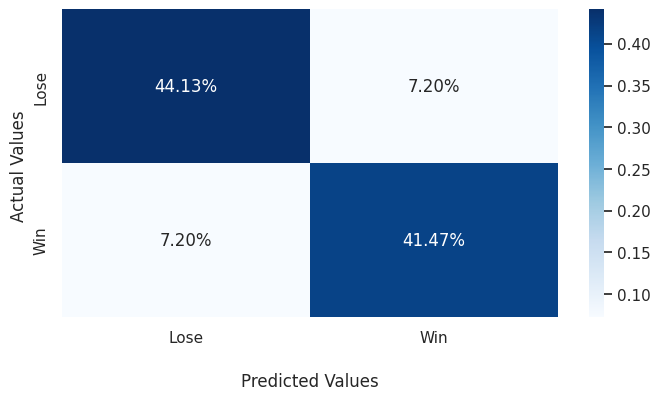

In [139]:
plt.rcParams["figure.figsize"] = (8, 4)

ax = sns.heatmap(confusion_matrix1/np.sum(confusion_matrix1), annot=True, fmt='.2%', cmap='Blues')
# ax.set_title('Model-1\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Lose','Win'])
ax.yaxis.set_ticklabels(['Lose','Win'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [140]:
lr2.predict_proba(X2_test)[10]

array([0.34803868, 0.65196132])

In [146]:
input_df = pd.DataFrame({'batting_team': ['Sri Lanka'], 'bowling_team': ['India'], 'city': ['Dubai'], 'current_score':[168], 'target_runs':[169], 'runs_left':[1], 'balls_left': [2], 'wickets_left':[7], 'crr':[8.08], 'rrr': [30.0]})
result = lr2.predict_proba(transformer2.transform(input_df))

loss = result[0][0]
win = result[0][1]

print('win: '+str(round(win*100))+'%')
print('loss: '+str(round(loss*100))+'%')

win: 0%
loss: 100%


# Model Extraction

In [147]:
#Model Extraction
pickle.dump(lr2, open('/content/drive/MyDrive/odi men/odi_mens_2nd_innings_win_prediction_final_model.pkl','wb'))